In [2]:
# Remember that wcword is different from word or token in usual sense! 
!man wc|grep -A 2 -B 1 "A word is"

       Print newline, word, and byte counts for each FILE, and a total line if
       more than one FILE is specified.  A word is a non-zero-length  sequence
       of characters delimited by white space.



# Load data

In [3]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['crawl'] = str(stats_dir)
    return df

ldf = pd.concat((load_lang_stat(d) 
                 for d in Path('.').glob('release1_deduped_stats')
                ), ignore_index=True)
print(ldf.crawl.value_counts())
ldf

crawl
release1_deduped_stats    75
Name: count, dtype: int64


,lang,text_newlines,text_wcwords,text_chars,text_bytes,docs,crawl
0,af,448064349,1871362554,13331724243,13475549529,1371732,release1_deduped_stats
1,ar,9199928573,51529199558,323491720272,527154118125,46644105,release1_deduped_stats
2,az,762174849,2944857613,22210490266,25209813882,2999633,release1_deduped_stats
3,be,292202283,1391858297,11412918936,19338568829,1263852,release1_deduped_stats
4,bg,3507250868,15482493215,103883730804,173045070450,13343257,release1_deduped_stats
...,...,...,...,...,...,...,...
70,uk,3176621860,18187535686,134141286346,230809447983,17860323,release1_deduped_stats
71,ur,267658190,2018995985,11134738511,16125024258,2230857,release1_deduped_stats
72,uz,92653353,556448432,4376122354,6116559302,633219,release1_deduped_stats
73,vi,9492177775,64973221783,316973571090,391798020201,40100516,release1_deduped_stats


In [4]:
linf = pd.read_csv('./_langs/code2name_cld2.tsv', sep='\t')
linf

,Code,Name
0,aa,afar
1,ab,abkhazian
2,af,afrikaans
3,ak,akan
4,am,amharic
...,...,...
165,za,zhuang
166,zh,chinese
167,zh-Hant,chineset
168,zu,zulu


In [5]:
ldf = ldf.merge(linf, how='left',left_on='lang',right_on='Code')
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_chars,text_bytes,docs,crawl,Code,Name
23,hbs,4769925615,19399570418,132100344345,145109810289,17842009,release1_deduped_stats,NaN,NaN
24,he,3727427854,15453815763,92696032944,151595358003,11241370,release1_deduped_stats,NaN,NaN
47,nb,3185946105,13896425473,92086539552,94064513467,14576409,release1_deduped_stats,NaN,NaN


In [6]:
ldf.loc[ldf['Name'].isnull(), 'Code'] = ldf.loc[ldf['Name'].isnull(), 'lang']

In [7]:
ldf.set_index('lang',inplace=True)
ldf['Name'].fillna({
    'hbs':'serbo-croatian', 'he':'hebrew', 'nb':'norwegian bokmål'}, inplace=True)
ldf['Name'].replace('norwegian_n','norwegian', inplace=True)
ldf.reset_index(inplace=True)

In [8]:
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_chars,text_bytes,docs,crawl,Code,Name


In [9]:
ldf.sample(10)

,lang,text_newlines,text_wcwords,text_chars,text_bytes,docs,crawl,Code,Name
39,lv,1478587817,5390036896,39757081472,42306511302,5123187,release1_deduped_stats,lv,latvian
5,bn,2425318193,8233442184,55137138454,129344904117,5968971,release1_deduped_stats,bn,bengali
32,ka,508902059,1678265729,12189258293,25069172650,1670420,release1_deduped_stats,ka,georgian
17,fa,13438921860,70380819063,383981951252,645385975027,42277337,release1_deduped_stats,fa,persian
51,pa,122703332,532706094,3061831084,6406864512,888467,release1_deduped_stats,pa,punjabi
49,nl,16515732334,71750734164,518324164641,523452464274,66622002,release1_deduped_stats,nl,dutch
34,kn,167037605,577952892,4072683417,8713870220,557821,release1_deduped_stats,kn,kannada
31,ja,51398019876,91406137590,892413995889,1976173092516,218847859,release1_deduped_stats,ja,japanese
7,cs,9882089347,41036918936,261843855665,287291452812,38564238,release1_deduped_stats,cs,czech
2,az,762174849,2944857613,22210490266,25209813882,2999633,release1_deduped_stats,az,azerbaijani


In [10]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='crawl', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)], fpath=None):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect, 
                        hue_order=None if part_col is None else sorted(ldf[part_col].unique()))
    if logscale:
        plt.xscale('log')
    plt.xlabel('')
    plt.ylabel('')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)
    if fpath:
        my_plot.savefig(fpath)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


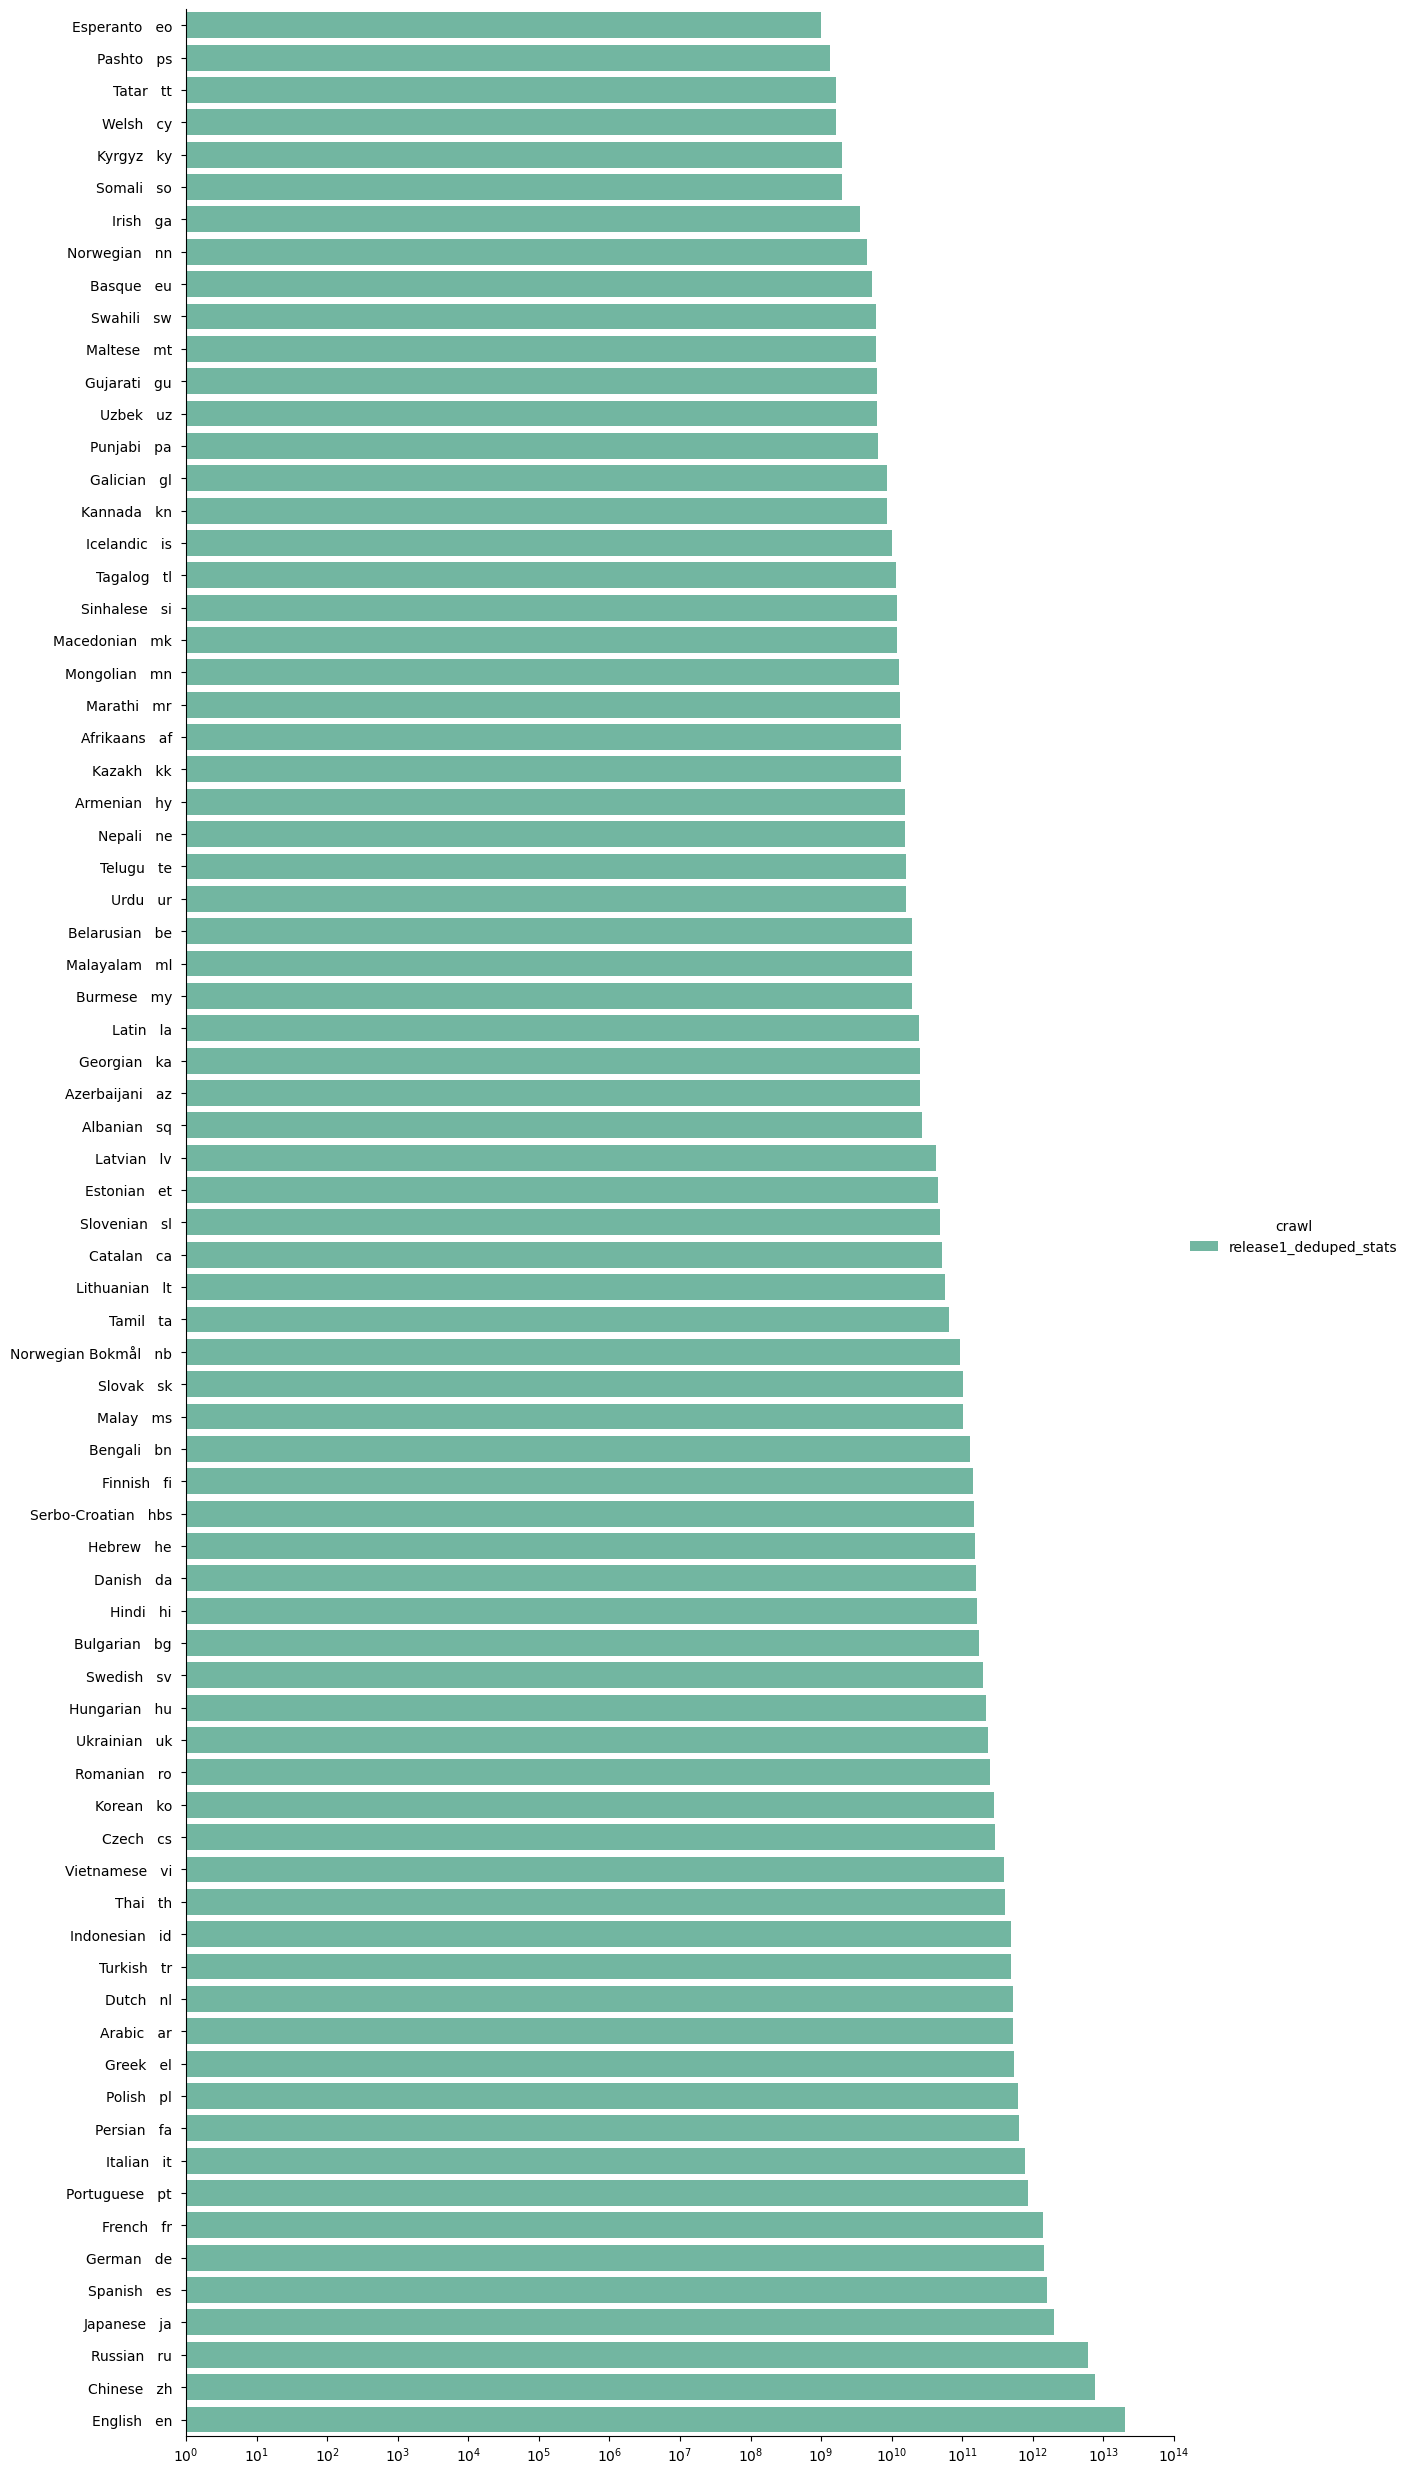

In [11]:
plot_df = ldf
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' #+ plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=25, aspect=0.5)

In [12]:
gdf = plot_df
gdf.describe()

,text_newlines,text_wcwords,text_chars,text_bytes,docs
count,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01
mean,1.482256e+10,7.525921e+10,5.394912e+11,6.678150e+11,6.994449e+07
std,5.042253e+10,3.359010e+11,2.391811e+12,2.567564e+12,2.501424e+08
min,2.294622e+07,1.341829e+08,8.221962e+08,9.913212e+08,1.426590e+05
25%,1.981336e+08,1.054976e+09,7.431395e+09,1.193180e+10,1.093988e+06
50%,1.478588e+09,5.852719e+09,4.475677e+10,4.899741e+10,5.818274e+06
75%,8.815391e+09,3.089959e+10,2.204538e+11,2.835277e+11,3.029084e+07
max,3.872315e+11,2.861890e+12,2.025506e+13,2.034250e+13,1.781837e+09


In [13]:
plot_df[plot_df['lang-descr'].str.contains('Pashto')]

,lang,text_newlines,text_wcwords,text_chars,text_bytes,docs,crawl,Code,Name,lang-descr
53,ps,26513154,167532890,822196168,1317181179,142659,release1_deduped_stats,ps,pashto,Pashto ps


In [14]:
q=plot_df.groupby('lang-descr').agg('sum').sort_values(by='text_bytes').drop(columns=['lang','Name','Code','crawl'])
lang_order = list(q.index)
q=q*1.0
q.loc['Total'] = q.sum(numeric_only=True)
q.to_csv('qwer.csv', float_format="%.2e", sep='\t')
!cat qwer.csv

lang-descr	text_newlines	text_wcwords	text_chars	text_bytes	docs
Esperanto   eo 	2.29e+07	1.47e+08	9.64e+08	9.91e+08	1.77e+05
Pashto   ps 	2.65e+07	1.68e+08	8.22e+08	1.32e+09	1.43e+05
Tatar   tt 	2.64e+07	1.34e+08	9.65e+08	1.63e+09	1.72e+05
Welsh   cy 	4.76e+07	2.44e+08	1.63e+09	1.64e+09	2.85e+05
Kyrgyz   ky 	2.83e+07	1.46e+08	1.12e+09	1.96e+09	1.88e+05
Somali   so 	4.41e+07	3.00e+08	1.99e+09	2.01e+09	3.75e+05
Irish   ga 	1.24e+08	5.20e+08	3.38e+09	3.61e+09	9.32e+05
Norwegian   nn 	1.41e+08	6.40e+08	4.36e+09	4.46e+09	7.53e+05
Basque   eu 	1.46e+08	7.17e+08	5.23e+09	5.30e+09	1.01e+06
Swahili   sw 	1.55e+08	9.11e+08	5.88e+09	5.94e+09	9.84e+05
Maltese   mt 	1.69e+08	8.19e+08	5.69e+09	6.01e+09	4.84e+05
Gujarati   gu 	8.39e+07	4.73e+08	2.95e+09	6.10e+09	4.55e+05
Uzbek   uz 	9.27e+07	5.56e+08	4.38e+09	6.12e+09	6.33e+05
Punjabi   pa 	1.23e+08	5.33e+08	3.06e+09	6.41e+09	8.88e+05
Galician   gl 	2.22e+08	1.29e+09	8.34e+09	8.56e+09	1.79e+06
Kannada   kn 	1.67e+08	5.78e+08	4.07e+09	8.71e+09	5.58e+

In [15]:
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + ' (' + plot_df.lang + ')' #+ plot_df.set.astype(str)

In [20]:
', '.join(plot_df['lang-descr'])

'Esperanto (eo), Pashto (ps), Tatar (tt), Welsh (cy), Kyrgyz (ky), Somali (so), Irish (ga), Norwegian (nn), Basque (eu), Swahili (sw), Maltese (mt), Gujarati (gu), Uzbek (uz), Punjabi (pa), Galician (gl), Kannada (kn), Icelandic (is), Tagalog (tl), Sinhalese (si), Macedonian (mk), Mongolian (mn), Marathi (mr), Afrikaans (af), Kazakh (kk), Armenian (hy), Nepali (ne), Telugu (te), Urdu (ur), Belarusian (be), Malayalam (ml), Burmese (my), Latin (la), Georgian (ka), Azerbaijani (az), Albanian (sq), Latvian (lv), Estonian (et), Slovenian (sl), Catalan (ca), Lithuanian (lt), Tamil (ta), Norwegian Bokmål (nb), Slovak (sk), Malay (ms), Bengali (bn), Finnish (fi), Serbo-Croatian (hbs), Hebrew (he), Danish (da), Hindi (hi), Bulgarian (bg), Swedish (sv), Hungarian (hu), Ukrainian (uk), Romanian (ro), Korean (ko), Czech (cs), Vietnamese (vi), Thai (th), Indonesian (id), Turkish (tr), Dutch (nl), Arabic (ar), Greek (el), Polish (pl), Persian (fa), Italian (it), Portuguese (pt), French (fr), German 

In [15]:
plot_df.groupby('crawl')['text_bytes'].agg('sum') / 2**40

crawl
release1_stats    176.154597
Name: text_bytes, dtype: float64

In [16]:
# sns.set_context('notebook')
# plot_langs(plot_df[plot_df.lang.isin(langs2)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
#            logscale=False,xticks=None, fpath='text_bytes_prop2.pdf')
# plt.xlabel('')
# plt.ylabel('')
# # plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

ValueError: Could not interpret input 'text_bytes_prop'

In [1]:
plot_df

NameError: name 'plot_df' is not defined